In [4]:
import pandas as pd;
import ipywidgets as widgets
from IPython.display import clear_output
import numpy as np
import random
from IPython.display import Image
from IPython.core.display import HTML 

 
# function for returning region on basis of generation number
def regionChecker(argument):
    switcher = { 
        1: "Kanto",
        2: "Johto",
        3: "Hoenn",
        4: "Sinnoh",
        5: "Unova",
        6: "Kalos",
    } 
    return switcher.get(argument['Generation'], "nothing");

# generate random colors
def colors(n): 
  rgb_values = [] 
  r = int(random.random() * 256) 
  g = int(random.random() * 256) 
  b = int(random.random() * 256) 
  step = 256 / n 
  for _ in range(n): 
    r += step 
    g += step 
    b += step 
    r = int(r) % 256 
    g = int(g) % 256 
    b = int(b) % 256
    rgb_values.append((r/256,g/256,b/256)) 
  return rgb_values

# read data for csv
pokemon_data = pd.read_csv('./PokemonData.csv');

# adding origin of pokemon/using pokeindex as indexing
data = pd.DataFrame(pokemon_data);
data = data.rename(columns={'Num': 'Pokedex_Index'});
data['Region_of_Origin'] = data.apply (lambda row: regionChecker(row), axis=1);
# remove uber strong pokemons
data.drop_duplicates(subset ="Pokedex_Index", 
                     keep = 'first', inplace = True) 
data = data.set_index('Pokedex_Index');
data

,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary,Region_of_Origin
Pokedex_Index,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,Kanto
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,Kanto
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,Kanto
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,Kanto
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,Kanto
...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True,Kalos
718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True,Kalos
719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,Kalos


Dropdown(description='Attribute', index=1, options=('HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed'), val…

Strongest:Rampardos


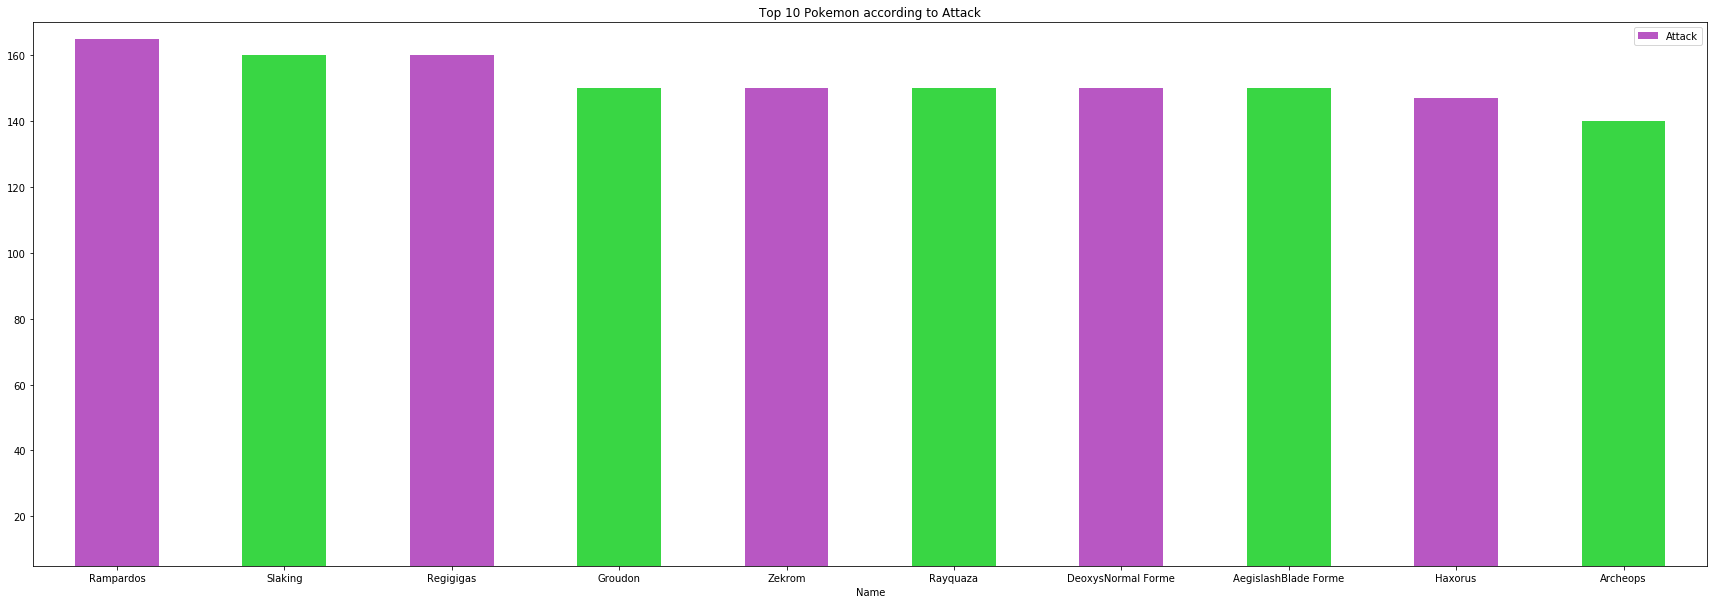

In [16]:
def attribute_data_handler(attrib):
    clear_output()
    attrib_data = data[['Name', attrib.new, 'Legendary']]
    display(attribute_dropdown)
    attrib_data = attrib_data.sort_values(by=attrib.new, ascending=False)
    print('Strongest:' + attrib_data.head(1)['Name'].iloc[0])
    maxYLimit = max(attrib_data[attrib.new])+5
    ax = attrib_data.head(10).plot(kind='bar',x='Name', y=attrib.new, rot=0, figsize=(30,10), 
                                   ylim=(min(attrib_data[attrib.new]),maxYLimit),
                                   title ='Top 10 Pokemon according to ' + attrib.new,
                                  color=colors(2))
    display(
        Image(url=
              "https://img.pokemondb.net/sprites/black-white/anim/normal/" 
              + attrib_data.head(1)['Name'].iloc[0].lower()
              + ".gif")
    )

attribute_dropdown = widgets.Dropdown(options=['HP','Attack','Defense', 'SpAtk','SpDef', 'Speed'],
                                      value=None,description='Attribute')
attribute_dropdown.observe(attribute_data_handler, names='value')
display(attribute_dropdown)

[(0.3984375, 0.97265625, 0.64453125), (0.5, 0.5, 0.5)]
